# Churn analysis to find the patterns in the customers who are leaving the bank and to retain the existing customers.

In [ ]:
#Import the required packages.

In [4]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                    
import seaborn as sns
import pandas as pd                         
import numpy as np                          


In [ ]:
# Checking the versions of the packages

In [5]:
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)


Pandas version:  1.3.4
Seaborn version:  0.11.2
Matplotlib version:  3.4.3


In [ ]:
# First upload the data.csv file in the current folder.
# Then read the file using read_csv function

In [6]:
df = pd.read_csv("data.csv") 

In [ ]:
# Checking some data from the beginning of the data frame.

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [ ]:
# Checking some data from the end of the data frame.

In [8]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,10294,61,0.189


In [9]:
print(df.shape)

(10127, 19)


In [ ]:
# Checking all column names in the data frame

In [10]:
print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')


In [ ]:
# Checking the characteristics of columns in the data frame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10034 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10067 non-null  float64
 14  Total_

In [ ]:
# Checking is there any null values in the data frame

In [12]:
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                       93
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [13]:
# install the tablulate package if it is not installed before

# pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [14]:
# User defined function to separate categorical and continuous data

In [15]:
def separate_data_types(df):
    categorical=[]
    continuous=[]
    for column in df.columns:
        if df[column].nunique() < 100:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous



In [ ]:
# Dispalying the separated data in tabular form

In [16]:
categorical, continuous=separate_data_types(df)
table=[categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous},headers=['categorical','continuous']))

categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Dependent_count           Credit_Limit
Education_Level           Total_Revolving_Bal
Marital_Status            Avg_Open_To_Buy
Income_Category           Total_Trans_Amt
Card_Category             Total_Trans_Ct
Months_on_book            Avg_Utilization_Ratio
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon


In [ ]:
# User defined function to get some information about the categorical data

In [17]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}") 
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}")
    if df[col].isnull().sum() > 0:  
        print(f"\nThere is a null values in the {col}")


### Analysis of Attrition_Flag attribute

In [18]:
info_of_cat("Attrition_Flag")

Unique values in Attrition_Flag are: ['Existing Customer' 'Attrited Customer']
Mode of Attrition_Flag is Existing Customer
Number of missing values in Attrition_Flag is 0


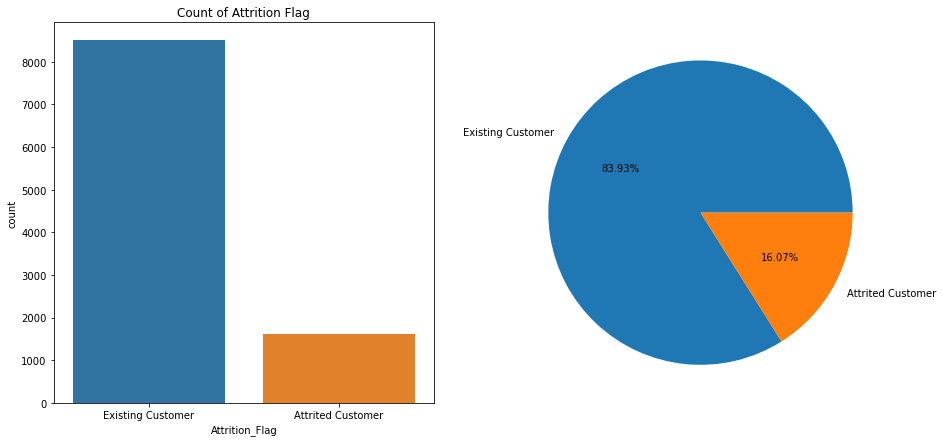

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Attrition Flag")           
percentage = df["Attrition_Flag"].value_counts()     
labels = list(df["Attrition_Flag"].value_counts().index)

sns.countplot(x = df["Attrition_Flag"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()


### Interpretation: Only 16 % of customers are leaving the bank

### Analysis of Gender attribute

In [20]:
info_of_cat("Gender")

Unique values in Gender are: ['M' 'F' nan]
Mode of Gender is F
Number of missing values in Gender is 93

There is a null values in the Gender


In [ ]:
gender_mode = df.Gender.mode()[0]
print(gender_mode)
df["Gender"].fillna(gender_mode, inplace = True) # Filling the null value with the mode value


F


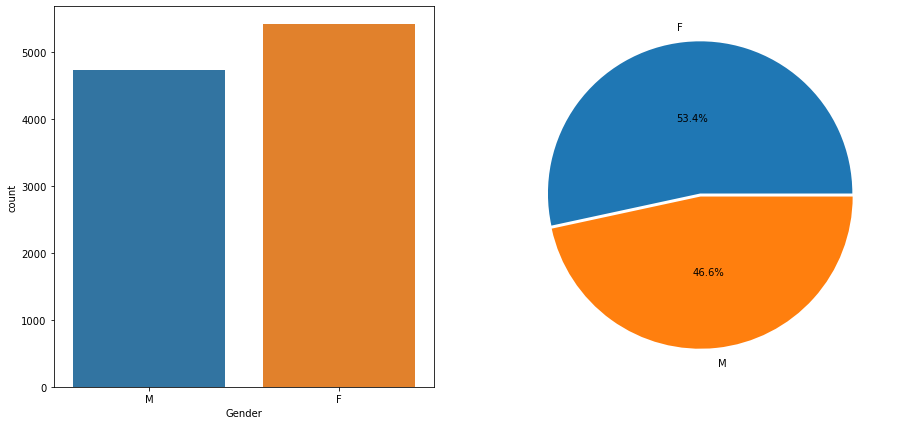

In [21]:

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = df["Gender"].value_counts()   
labels =data.keys()                  
sns.countplot(x = df["Gender"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", explode = [0.02, 0.0], labels = labels, pctdistance = 0.5) 
plt.show()


### Interpretation: Bank is having more female customers

### Analysis of Dependent_count attribute

In [22]:
info_of_cat("Dependent_count") 

Unique values in Dependent_count are: [  3   5   4   2   0   1   9  29 103  22  25  78  90  35  60  42 119 104
  88  48  34 143 100  59 130  95   7  82  69  92 110  17  10  27  19 109
 142 116 113 125  80  63  24  97 102  52  87  11 117  13  67  89  61  72
 120  76]
Mode of Dependent_count is 3
Number of missing values in Dependent_count is 0


<function matplotlib.pyplot.show(close=None, block=None)>

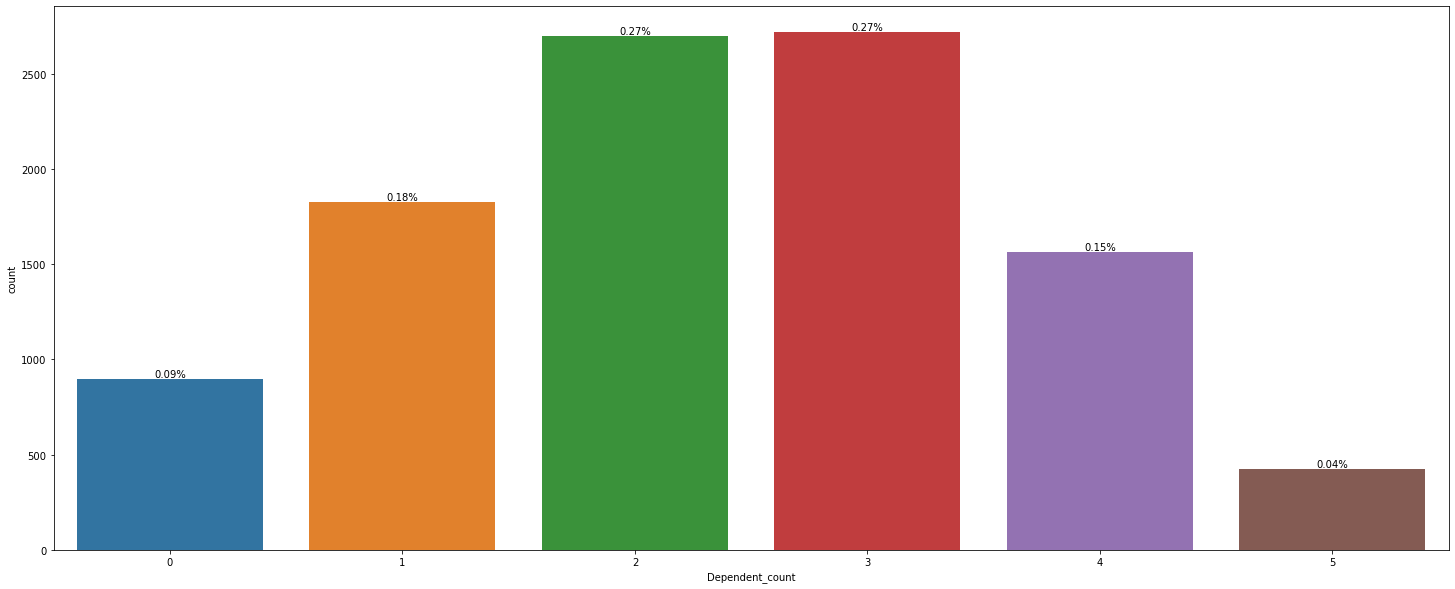

In [134]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Dependent_count"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /len(df), 2)}%"                                                                              
    x = bar.get_x() + bar.get_width() /2 
    y = bar.get_height()                                         
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
    fig.set_figheight(10)
    fig.set_figwidth(25)

plt.show

In [ ]:
# Dependent_count column has some values more than 100. It is wrong. 
# So we are changing all the Dependent_count values which are greater than 5 to the mean value.

In [25]:
mean = int(df.Dependent_count.mean())
print(mean)
x = df[df["Dependent_count"] > 5].index
for index in x:
    df.loc[index, "Dependent_count"] = mean  


2


In [26]:
info_of_cat("Dependent_count") 

Unique values in Dependent_count are: [3 5 4 2 0 1]
Mode of Dependent_count is 3
Number of missing values in Dependent_count is 0


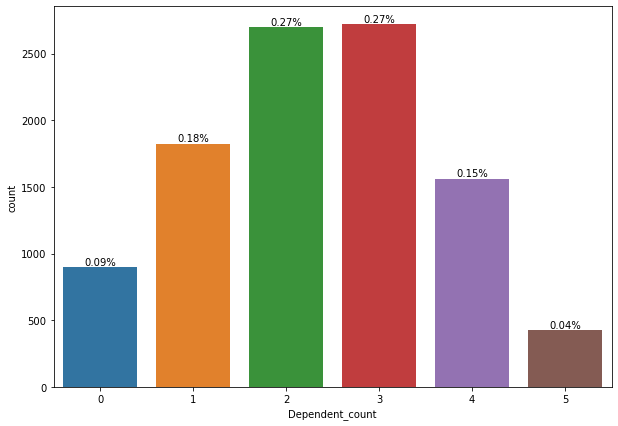

In [135]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Dependent_count"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /len(df), 2)}%"                                                                              
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                         
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )                                                                       
plt.show()


### Interpretation: More customers are having 2 or 3 dependents

### Analysis of Education_Level attribute

In [28]:

info_of_cat("Education_Level") 

Unique values in Education_Level are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


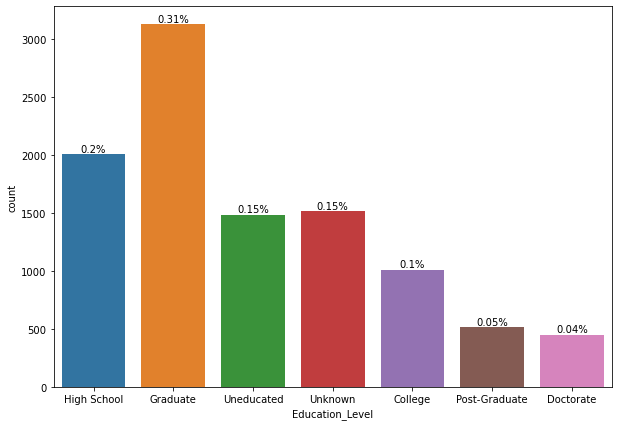

In [29]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Education_Level"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /len(df), 2)}%"                                                                              
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                         
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )                                                                       
plt.show()

### Interpretation: Most of the customers are Graduated.

### Analysis of Marital_Status attribute

In [30]:
info_of_cat("Marital_Status") 

Unique values in Marital_Status are: ['Married' 'Single' 'Unknown' 'Divorced']
Mode of Marital_Status is Married
Number of missing values in Marital_Status is 0


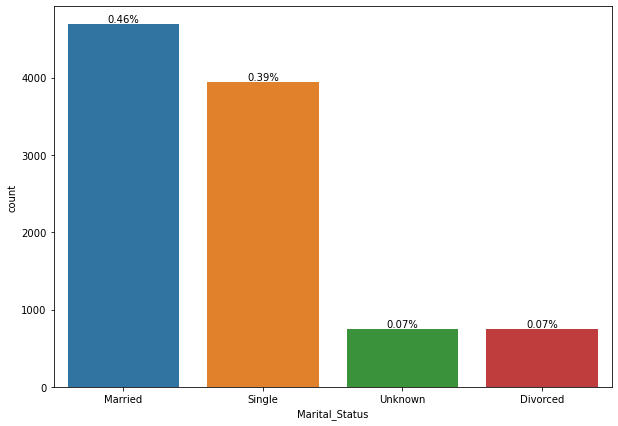

In [31]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Marital_Status"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /len(df), 2)}%"                                                                              
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                         
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )                                                                       
plt.show()

### Interpretation: Most of the customers are married

### Analysis of Income_Category attribute

In [32]:
info_of_cat("Income_Category")

Unique values in Income_Category are: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Mode of Income_Category is Less than $40K
Number of missing values in Income_Category is 0


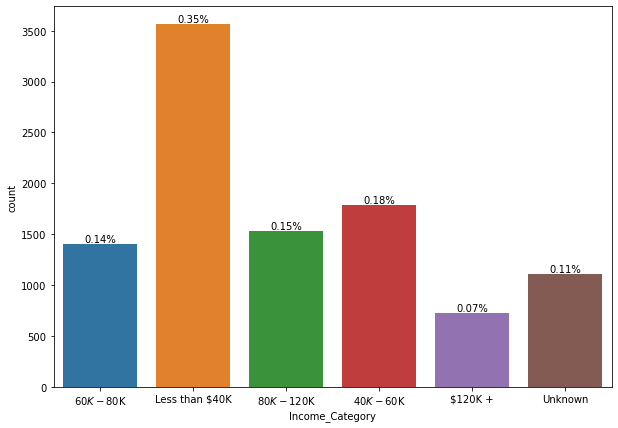

In [33]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Income_Category"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /len(df), 2)}%"                                                                              
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                         
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )                                                                       
plt.show()

### Interpretation: More customers are having less then 40K salary

### Analysis of Card_Category attribute

In [34]:
info_of_cat("Card_Category")

Unique values in Card_Category are: ['Blue' 'Gold' 'Silver' nan 'Platinum']
Mode of Card_Category is Blue
Number of missing values in Card_Category is 132

There is a null values in the Card_Category


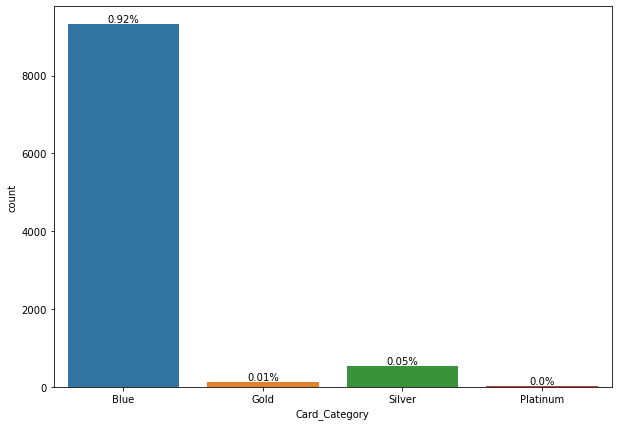

In [35]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Card_Category"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() /len(df), 2)}%"                                                                              
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                         
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )                                                                       
plt.show()

In [ ]:
# Filling the null values with the mode value.

In [36]:
card_mode = df.Card_Category.mode()[0]
print(card_mode)
df["Card_Category"].fillna(card_mode, inplace = True)

Blue


In [37]:
info_of_cat("Card_Category")

Unique values in Card_Category are: ['Blue' 'Gold' 'Silver' 'Platinum']
Mode of Card_Category is Blue
Number of missing values in Card_Category is 0


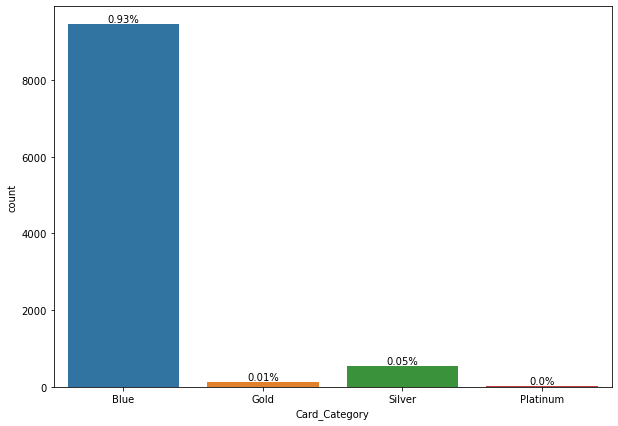

In [136]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Card_Category"])
create_plot(ax,len(df))

### Interpretation: Most of the customers are having Blue card.

In [ ]:
# User defined function to create percentage value of bar size

In [39]:
def create_plot(ax, count:"number of rows in data"):
    for bar in ax.patches:
        percentage = f"{round(bar.get_height() /len(df), 2)}%"                                                                              
        x = bar.get_x() + bar.get_width() /2                            
        y = bar.get_height()                                         
        ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )                                                                       
    plt.show()

### Analysis of Months_on_book attribute

In [40]:
info_of_cat("Months_on_book")

Unique values in Months_on_book are: [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Mode of Months_on_book is 36
Number of missing values in Months_on_book is 0


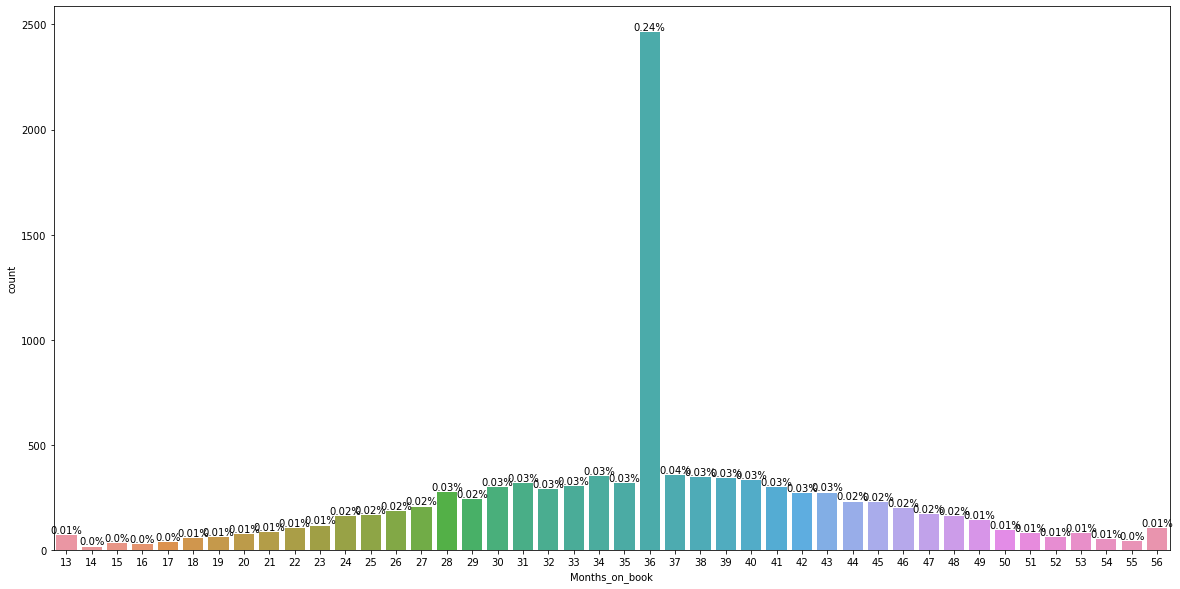

In [41]:
fig, ax = plt.subplots(figsize= (20, 10))
ax = sns.countplot(x = df["Months_on_book"])
create_plot(ax,len(df))

### Interpretation: Most of the loans are purchased 3 years before.

### Analysis of Total_Relationship_Count attribute

In [42]:
info_of_cat("Total_Relationship_Count")

Unique values in Total_Relationship_Count are: [5 6 4 3 2 1]
Mode of Total_Relationship_Count is 3
Number of missing values in Total_Relationship_Count is 0


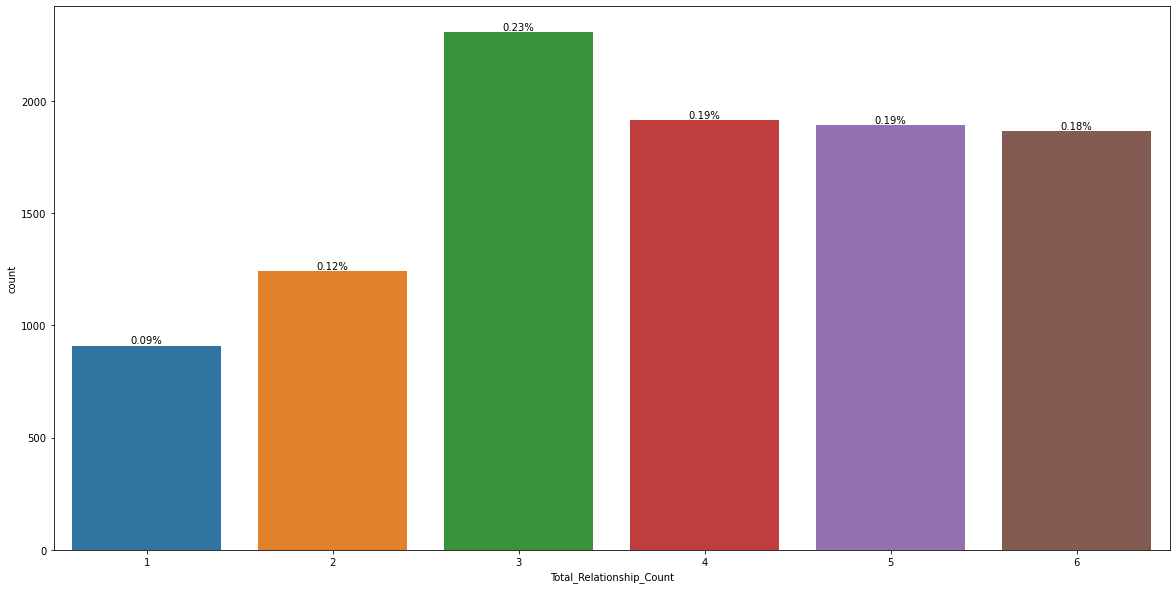

In [43]:
fig, ax = plt.subplots(figsize= (20, 10))
ax = sns.countplot(x = df["Total_Relationship_Count"])
create_plot(ax,len(df))

### Interpretation: Most of the customers are being with the bank for more than 3 years

### Analysis of Months_Inactive_12_mon

In [44]:
info_of_cat("Months_Inactive_12_mon")

Unique values in Months_Inactive_12_mon are: [1 4 2 3 6 0 5]
Mode of Months_Inactive_12_mon is 3
Number of missing values in Months_Inactive_12_mon is 0


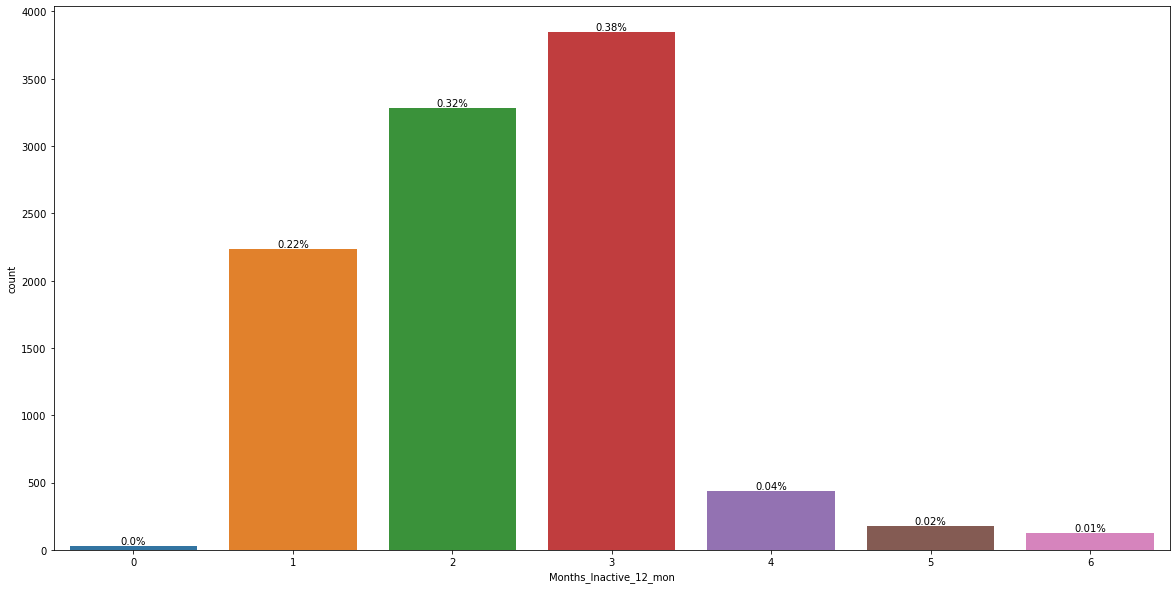

In [45]:
fig, ax = plt.subplots(figsize= (20, 10))
ax = sns.countplot(x = df["Months_Inactive_12_mon"])
create_plot(ax,len(df))

### Interpretation: More accounts are inactive for 3 months.

### Analysis of Contacts_Count_12_mon attribute

In [46]:
info_of_cat("Contacts_Count_12_mon")

Unique values in Contacts_Count_12_mon are: [3 2 0 1 4 5 6]
Mode of Contacts_Count_12_mon is 3
Number of missing values in Contacts_Count_12_mon is 0


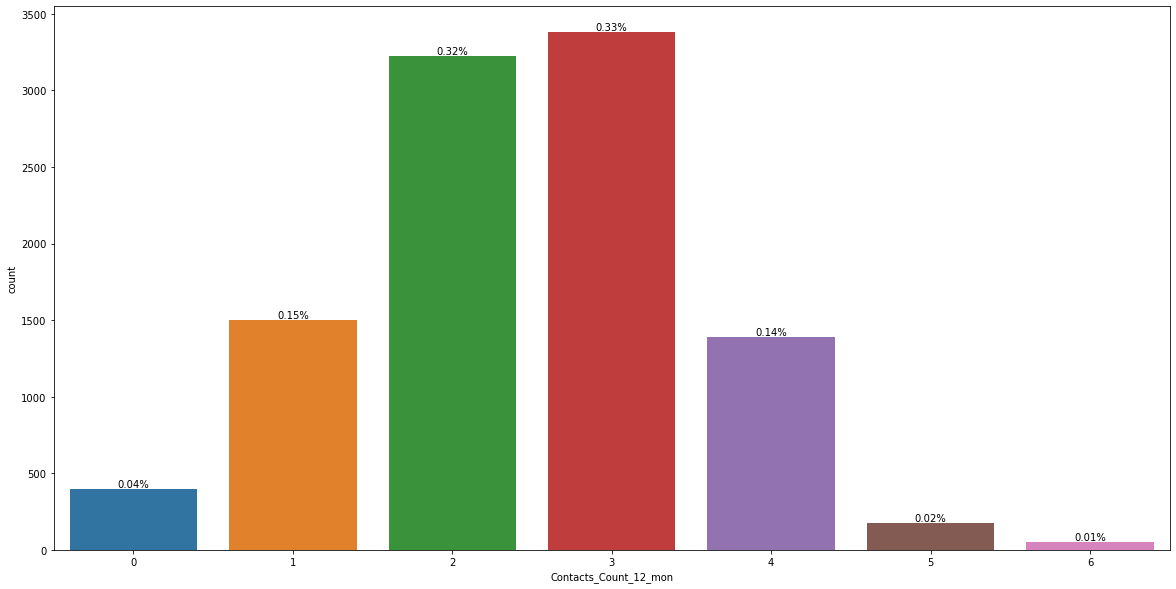

In [47]:
fig, ax = plt.subplots(figsize= (20, 10))
ax = sns.countplot(x = df["Contacts_Count_12_mon"])
create_plot(ax,len(df))

## Interpretation: Usually people have 3 years of relationship with the bank. Then, there is a decline of 3%. Later, there is a very little variation. Approximately 20% of the people tend to leave in their first 2 years.

## 𝑈𝑛𝑖𝑣𝑎𝑟𝑖𝑎𝑡𝑒 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠 𝑜𝑓 Continuous 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠

In [ ]:
# User defined function to get some information about the Continuous variable

In [48]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")


### Analysis of Customer_Age

In [49]:
info_of_numerical("Customer_Age")

The mean of the Customer_Age is 47.285276982324476
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 44
The standard deviation of the Customer_Age is 13.270923260536502
Number of missing values in the Customer_Age is 0


So the range will be between 47-13 to 47+13 (mean & std. deviation)

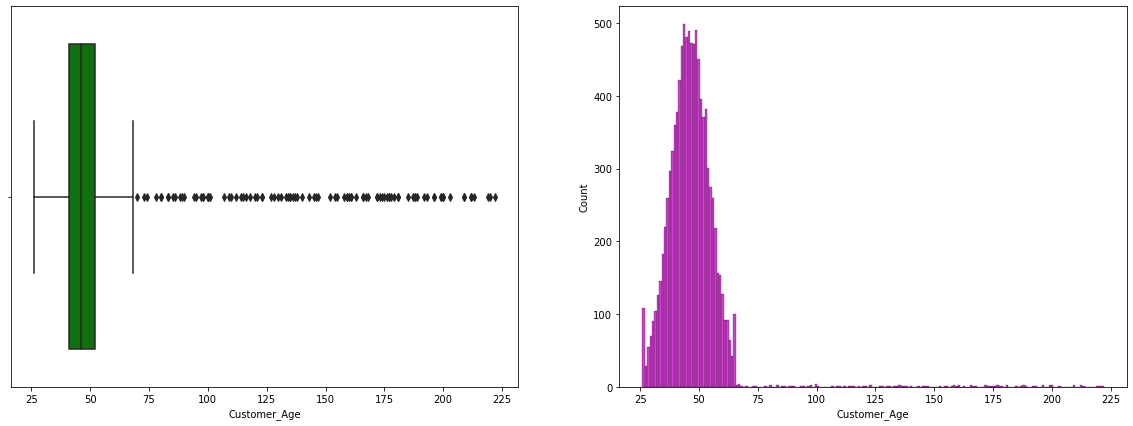

In [50]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(x = df["Customer_Age"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Customer_Age"], ax = ax[0], color = "g")  
plt.show()


In [ ]:
# Some of the customer's age is more than 75, it is highly impossible. 
# So it might be wrong data. So updating the age of customers who had more than 75 to the mean value.

In [51]:
mean=df['Customer_Age'].mean()
x=df[df['Customer_Age']>75].index
for index in x:
    df.loc[index,'Customer_Age']=mean

In [52]:
info_of_numerical("Customer_Age")

The mean of the Customer_Age is 46.33202197988588
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 44.0
The standard deviation of the Customer_Age is 7.97778121137982
Number of missing values in the Customer_Age is 0


In [ ]:
# User defined fuction to create histogram and box plot for the given data

In [53]:
def create_plot_num(col):
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))
    sns.histplot(x = df[col], ax =ax[1], color = "m") 
    sns.boxplot(x = df[col], ax = ax[0], color = "g")  
    plt.show()


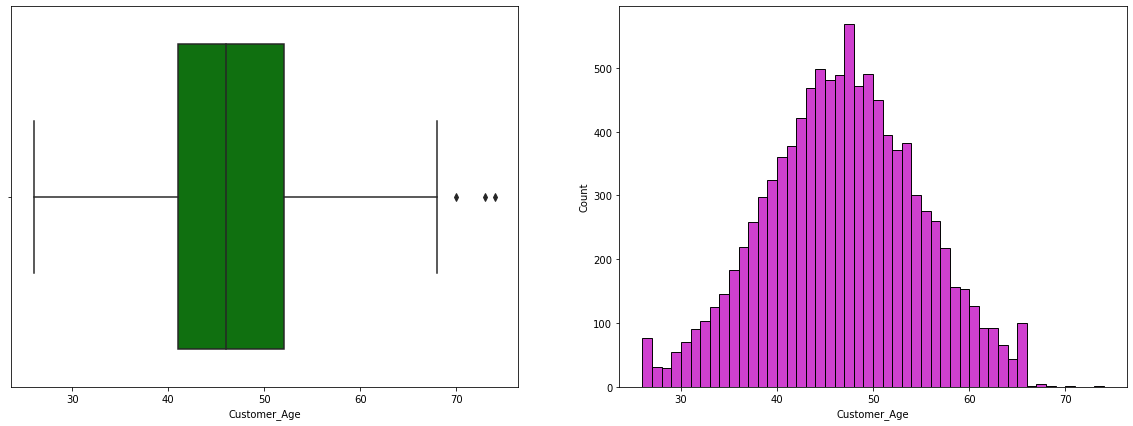

In [54]:
create_plot_num('Customer_Age')

### Interpretation: Most of the customers falling between 40 to 50 age group.

### Analysis of Credit_Limit

In [72]:
info_of_numerical("Credit_Limit")

The mean of the Credit_Limit is 8703.180550312796
The median of the Credit_Limit is 4557.0
The mode of the Credit_Limit is 34516.0
The standard deviation of the Credit_Limit is 9190.058901949453
Number of missing values in the Credit_Limit is 60


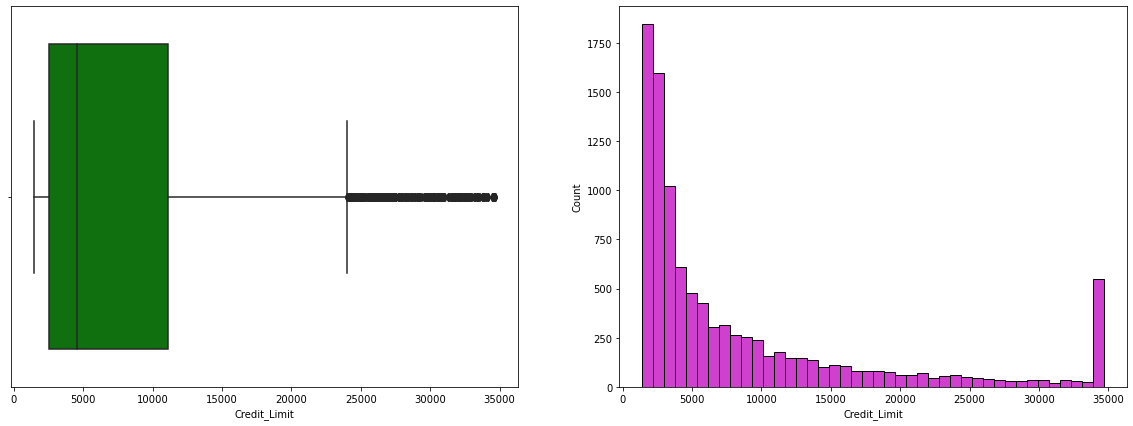

In [74]:
create_plot_num('Credit_Limit')

In [ ]:
# Filling the missing value with the mode value

In [16]:
mode=df['Credit_Limit'].mode()[0]
df['Credit_Limit'].fillna(mode,inplace=True)

In [78]:
info_of_numerical("Credit_Limit")

The mean of the Credit_Limit is 8856.115196998016
The median of the Credit_Limit is 4597.0
The mode of the Credit_Limit is 34516.0
The standard deviation of the Credit_Limit is 9374.508947187947
Number of missing values in the Credit_Limit is 0


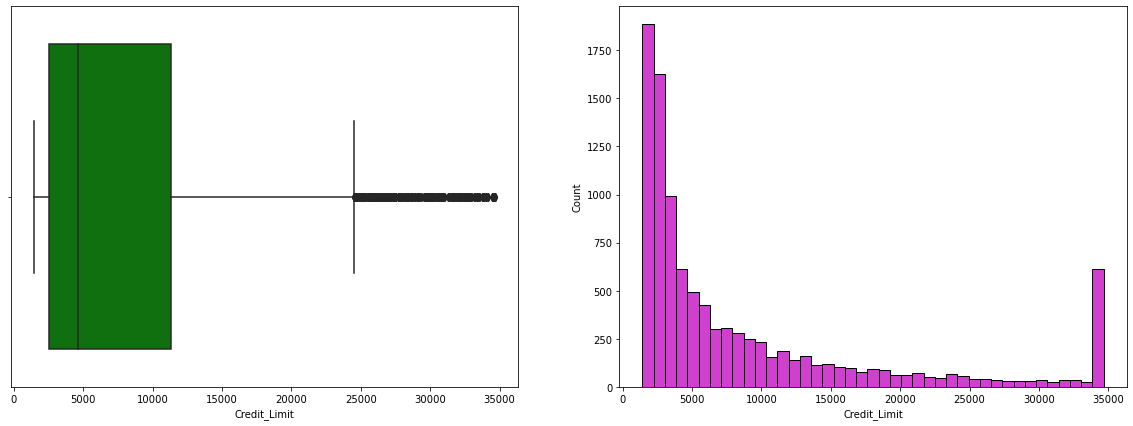

In [79]:
create_plot_num('Credit_Limit')

### Interpretation: Most of the credit limit falls between 2500 to 120000 range

### Analysis of Total_Revolving_Bal

In [80]:
info_of_numerical("Total_Revolving_Bal")

The mean of the Total_Revolving_Bal is 1162.8140614199665
The median of the Total_Revolving_Bal is 1276.0
The mode of the Total_Revolving_Bal is 0
The standard deviation of the Total_Revolving_Bal is 814.9873352357697
Number of missing values in the Total_Revolving_Bal is 0


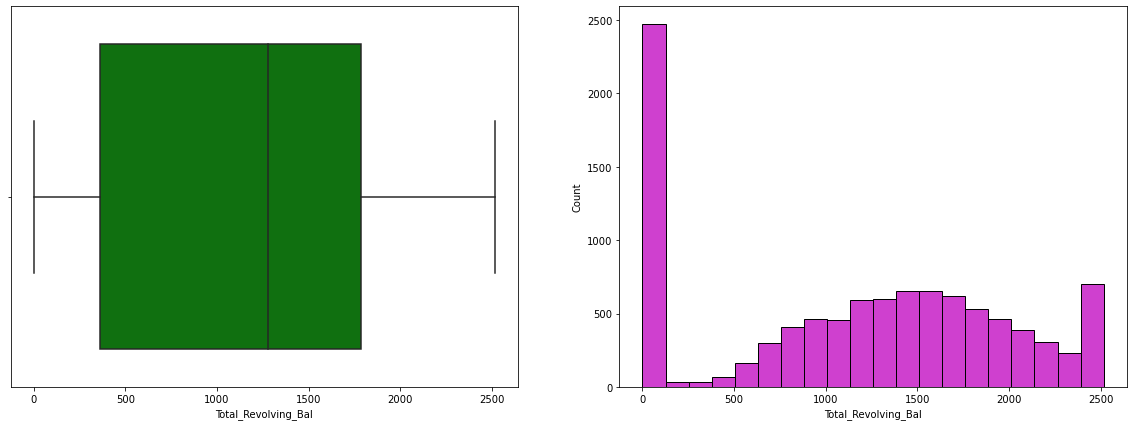

In [81]:
create_plot_num('Total_Revolving_Bal')

### Interpretation: The balance is between 500 to 1750.

### Analysis of Avg_Open_To_Buy

In [83]:
info_of_numerical("Avg_Open_To_Buy")

The mean of the Avg_Open_To_Buy is 7469.139636614887
The median of the Avg_Open_To_Buy is 3474.0
The mode of the Avg_Open_To_Buy is 1438.3
The standard deviation of the Avg_Open_To_Buy is 9090.685323679128
Number of missing values in the Avg_Open_To_Buy is 0


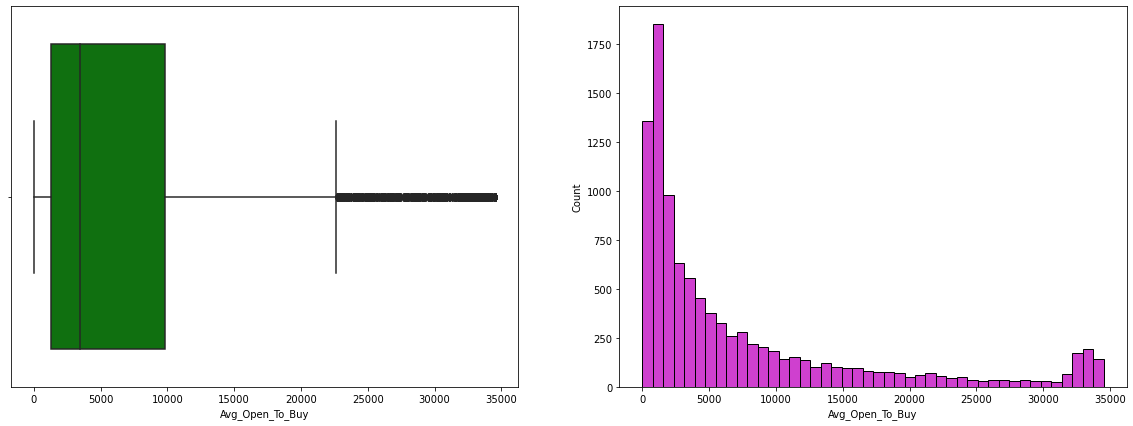

In [82]:
create_plot_num('Avg_Open_To_Buy')

### Interpretation: Most of the people have very less Avg-Open-To-buy. Only few people are having more balance in their credit.

### Analysis of Total_Trans_Amt

In [84]:
info_of_numerical("Total_Trans_Amt")

The mean of the Total_Trans_Amt is 4404.086303939963
The median of the Total_Trans_Amt is 3899.0
The mode of the Total_Trans_Amt is 4253
The standard deviation of the Total_Trans_Amt is 3397.129253557085
Number of missing values in the Total_Trans_Amt is 0


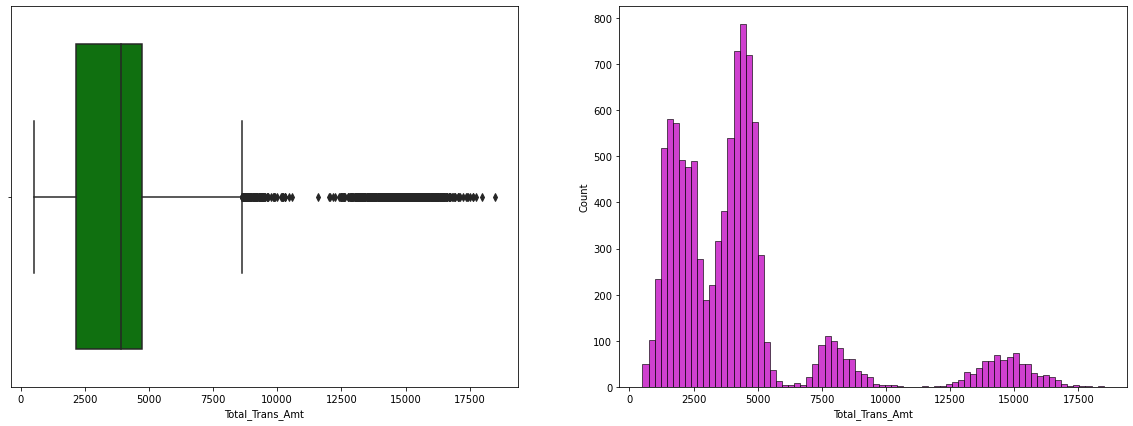

In [85]:
create_plot_num('Total_Trans_Amt')

### Interpretation: Most of the transaction amount falls between 2500 to 5000

### Analysis of Total_Trans_Ct

In [86]:
info_of_numerical("Total_Trans_Ct")

The mean of the Total_Trans_Ct is 64.85869457884863
The median of the Total_Trans_Ct is 67.0
The mode of the Total_Trans_Ct is 81
The standard deviation of the Total_Trans_Ct is 23.472570449233046
Number of missing values in the Total_Trans_Ct is 0


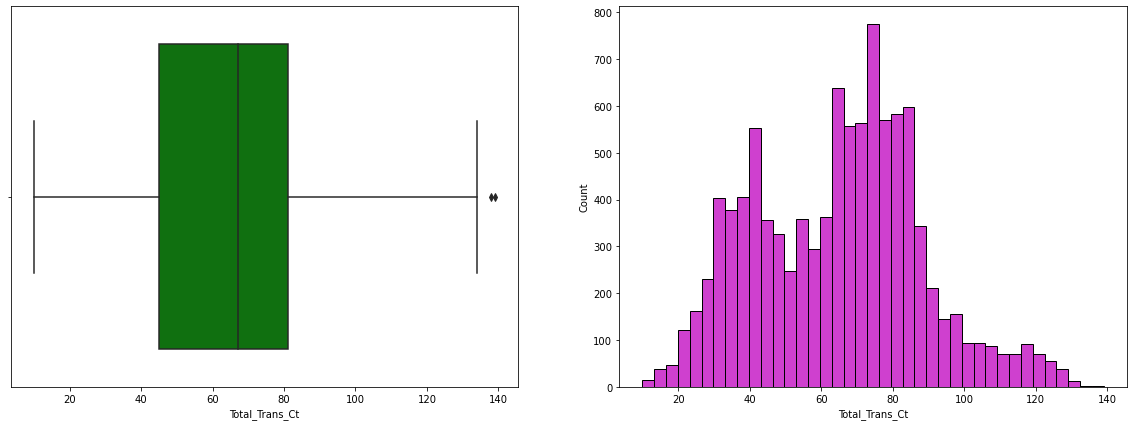

In [87]:
create_plot_num('Total_Trans_Ct')

### Interpretation: Most of the people do transaction around 45 to 80

### Analysis of Avg_Utilization_Ratio

In [88]:
info_of_numerical("Avg_Utilization_Ratio")

The mean of the Avg_Utilization_Ratio is 0.2748935518909845
The median of the Avg_Utilization_Ratio is 0.176
The mode of the Avg_Utilization_Ratio is 0.0
The standard deviation of the Avg_Utilization_Ratio is 0.2756914692523933
Number of missing values in the Avg_Utilization_Ratio is 0


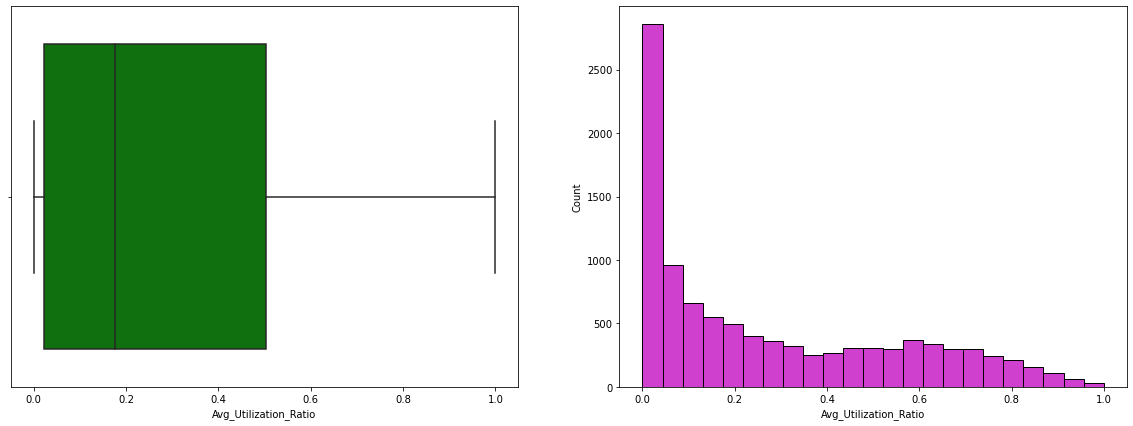

In [89]:
create_plot_num('Avg_Utilization_Ratio')

### Interpretation: Very less ratio of people used the card more.

### CAT-CAT Analysis (relationship between categorical data)

#### Relationship of Attrition_Flag with Gender

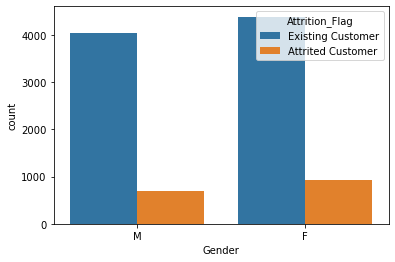

In [4]:
#fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Gender", hue = "Attrition_Flag", data = df)
plt.show()


### Interpretation: Female customers leaving the bank more

#### Relationship of Attrition_Flag with Dependent_count

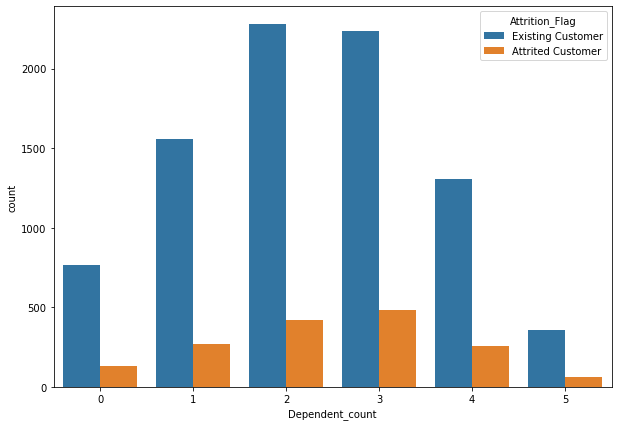

In [7]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Dependent_count", hue = "Attrition_Flag", data = df)
plt.show()


### Customers with 3 dependents are leaving more

#### Relationship of Attrition_Flag with Education_Level

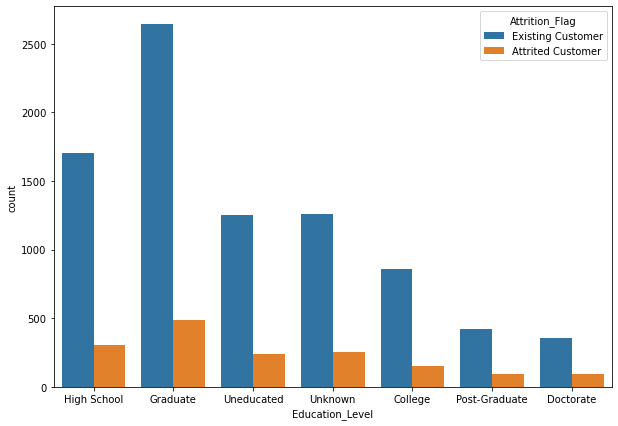

In [8]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Education_Level", hue = "Attrition_Flag", data = df)
plt.show()


### Interpretation: From Uneducated and Unknown category almost 25% of people are leaving. And Graduted customers also leaving more.

#### Relationship of Attrition_Flag with Income_Category

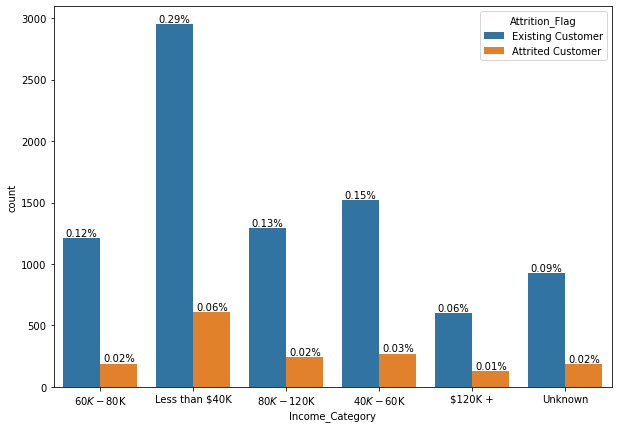

In [12]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Income_Category", hue = "Attrition_Flag", data = df)
create_plot(ax,len(df))


### Interpretation: Customers with less than 40K salary are leaving more.

#### Relationship of Attrition_Flag with Card_Category

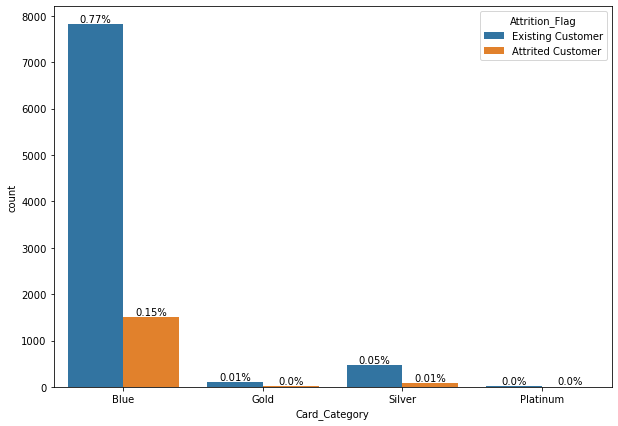

In [13]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Card_Category", hue = "Attrition_Flag", data = df)
create_plot(ax,len(df))

### Interpretation: Blue category card holders are leaving the bank more.

### Categorical to Continuous

#### Relationship of Attrition_Flag with Customer_Age

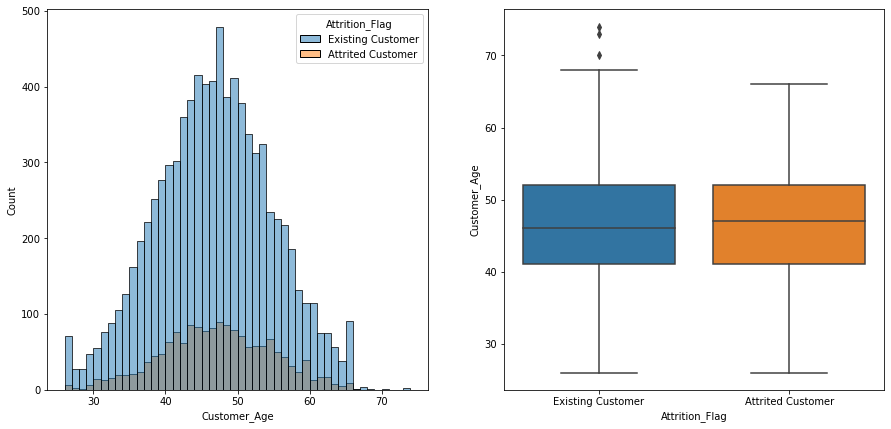

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Customer_Age"], hue = df["Attrition_Flag"], ax = ax[0])
sns.boxplot(y = df["Customer_Age"], x = df["Attrition_Flag"], ax = ax[1])
plt.show()


### Interpretation: Between 40 to 50 age group is leaving more.

#### Relationship of Attrition_Flag with Credit_Limit

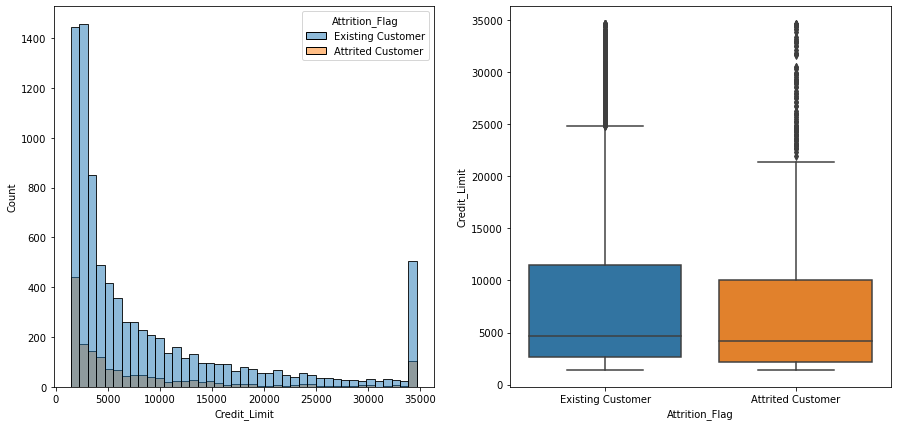

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Credit_Limit"], hue = df["Attrition_Flag"], ax = ax[0])
sns.boxplot(x = df["Attrition_Flag"] ,y = df["Credit_Limit"] , ax = ax[1])
plt.show()


### Interpretation: There is no much difference bewteen customer who stayed and left the bank based on the credit limit.

#### Relationship of Attrition_Flag with Avg_Utilization_Ratio

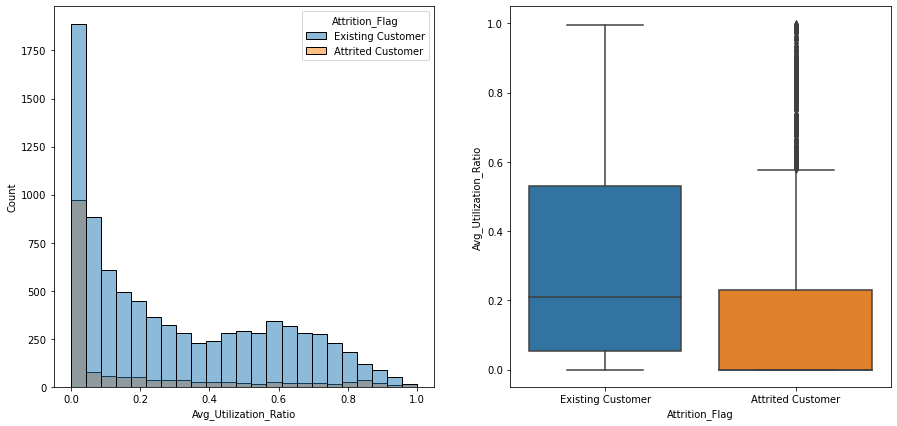

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Avg_Utilization_Ratio"], hue = df["Attrition_Flag"], ax = ax[0])
sns.boxplot(x = df["Attrition_Flag"] ,y = df["Avg_Utilization_Ratio"] , ax = ax[1])
plt.show()


### Interpretation: Customers who utilized the card more only left the bank more.

#### Relationship of Attrition_Flag with Avg_Open_To_Buy

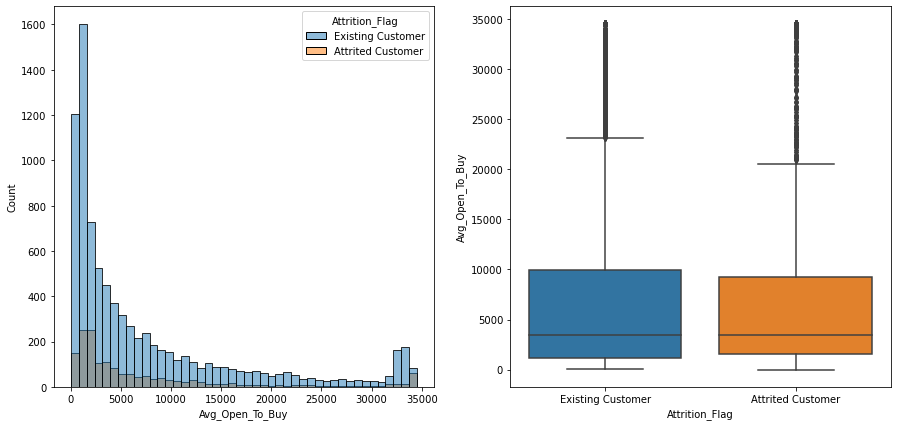

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Avg_Open_To_Buy"], hue = df["Attrition_Flag"], ax = ax[0])
sns.boxplot(x = df["Attrition_Flag"] ,y = df["Avg_Open_To_Buy"] , ax = ax[1])
plt.show()


### Interpretation: There is no much difference between the customers who stayed and left the bank.

#### Which age group of women have a larger churn?

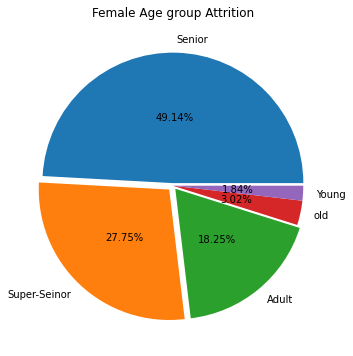

In [29]:
females = df[(df["Gender"]=="F") & (df["Attrition_Flag"]=="Attrited Customer")] 
bins =     [0,30, 40,   50, 60, 70]                                             
labels =  ["Young", "Adult", "Senior", "Super-Seinor", "old"]                   
data = pd.cut(females["Customer_Age"], bins = bins, labels = labels)
data = data.value_counts()                                                      
pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,explode = [0.02, 0.04, 0.03, 0,0] ,labels =data.index, pctdistance = 0.5,autopct="%.2f%%") 
plt.title("Female Age group Attrition")
plt.show()


### Interpretation: 40 to 50 age group of female customers leaving more.

#### Analyze the churn of women customers based on their education levels.

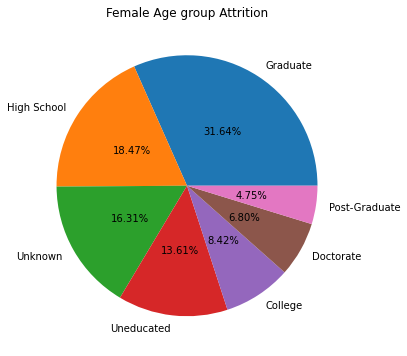

In [32]:
data = df[(df["Gender"]=="F") & (df["Attrition_Flag"]=="Attrited Customer")]

data = data["Education_Level"] 
data = data.value_counts()
pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,labels =data.index, pctdistance = 0.5, autopct="%.2f%%") 
plt.title("Female Age group Attrition")
plt.show()


### Interpretation: Female's with Graduate education level are churned out more.

#### 3. Is the average total transaction amount of the women who churned out is different from those who are still with the bank?

In [33]:
with_bank = df[(df["Gender"] == "F") & (df["Attrition_Flag"] == "Existing Customer")]
left_bank = df[(df["Gender"] == "F") & (df["Attrition_Flag"] == "Attrited Customer")]
with_bank_mean = with_bank["Total_Trans_Amt"].mean()
left_bank_mean = left_bank["Total_Trans_Amt"].mean()


In [34]:
print(f"Women who are with the bank their average transaction amount is {round(with_bank_mean, 3)}")
print(f"Women who left the bank their average transaction amountis {round(left_bank_mean,3)}")


Women who are with the bank their average transaction amount is 4649.458
Women who left the bank their average transaction amountis 2784.701


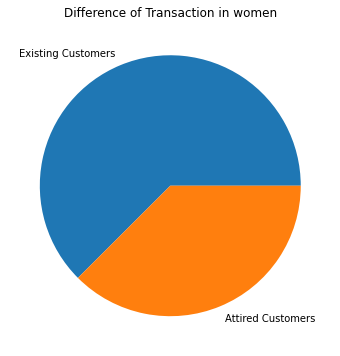

In [35]:
data = [4650, 2792]
fig, ax = plt.subplots(figsize = [10,6])
plt.pie(data, labels = ["Existing Customers", "Attired Customers"])
plt.title("Difference of Transaction in women")
plt.show()


### Interpretation: Attrited female customers did less number of transactions compared to that of existing customers.

#### 4. Age-wise analysis of the customers whose dependent count is 2 or 3 (Existing and Churned out)

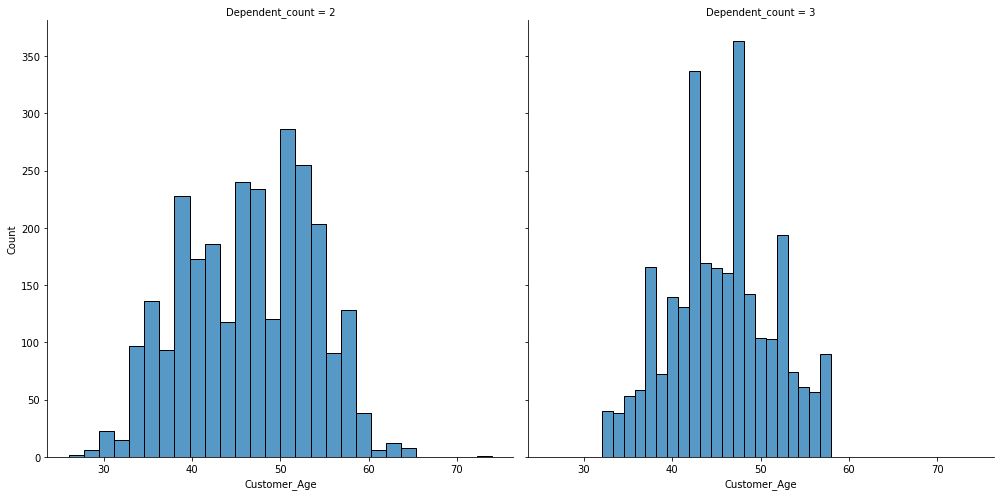

In [36]:
data = df[(df["Dependent_count"] == 2) | (df["Dependent_count"] == 3)]
g = sns.FacetGrid(data, col = "Dependent_count", height = 7)
g.map(sns.histplot, "Customer_Age")
plt.show()


In [37]:
dep_2_mean = data[data["Dependent_count"] == 2]["Customer_Age"].mean()
dep_3_mean = data[data["Dependent_count"] == 3]["Customer_Age"].mean()
print(dep_2_mean)
print(dep_3_mean)


46.33091216174808
45.50551425883188


### 7. Card category wise analysis of customers who are high school pass outs and churned out

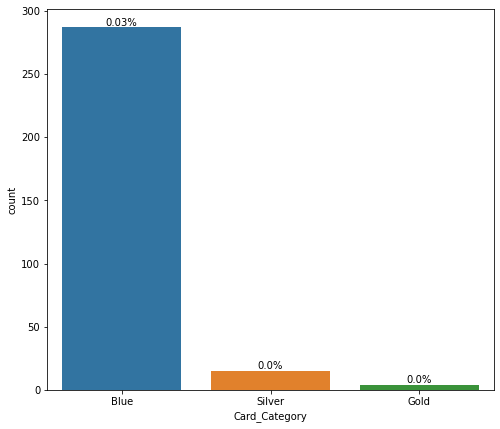

In [62]:
data=df[(df['Education_Level']=='High School') & (df['Attrition_Flag']=='Attrited Customer')]
fig, ax = plt.subplots(figsize= (8, 7))
sns.countplot(x = data["Card_Category"])
create_plot(ax,len(data))


### Interpretation: Customers with educational level as High School Pass outs and holding Blue card are attrited more.

## 8. Income category wise breakdown of the customers who are high school pass outs and are still with the bank

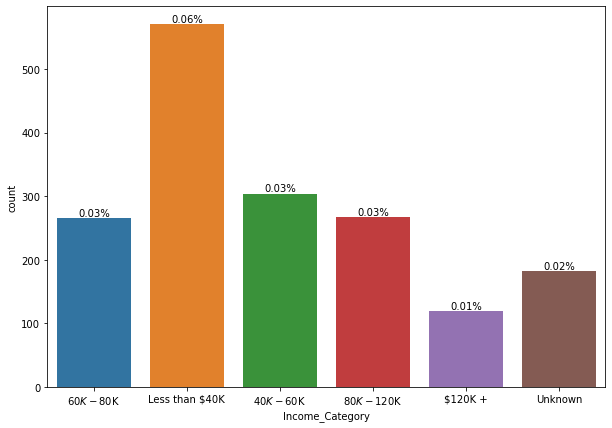

In [75]:
data=df[(df['Education_Level']=='High School') & (df['Attrition_Flag']=='Existing Customer')]

fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Income_Category", data = data)
create_plot(ax,len(data))

### Interpretation: Customers who are high school pass outs and their income is less than $40K, they are staying with the bank more.

## 9. Present the details of Total Transaction Amount of existing customers who are high school pass outs.

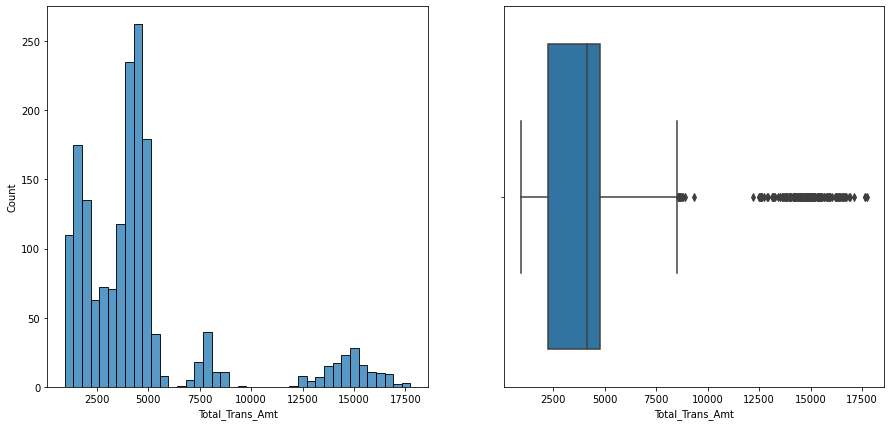

In [72]:
data=df[(df['Education_Level']=='High School') & (df['Attrition_Flag']=='Existing Customer')]

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = data['Total_Trans_Amt'],ax = ax[0])
sns.boxplot(x = data["Total_Trans_Amt"] ,ax = ax[1])

plt.show()

In [73]:
data['Total_Trans_Amt'].mean()

4640.731693028705

### Interpretation: Customers who are High School pass outs and staying with the bank are having transaction amount mostly between 3000 to 5000 and having the average of 4640

## 10. Analysis of the education level of the customers who are with the bank and those who left

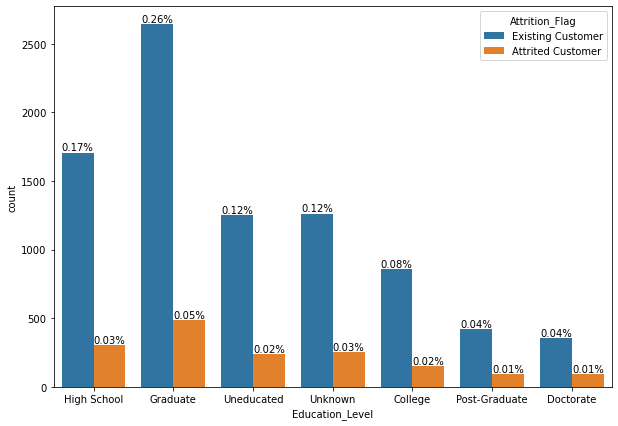

In [80]:
fig, ax=plt.subplots(figsize=(10,7))
sns.countplot(x=df['Education_Level'], hue=df['Attrition_Flag'])
create_plot(ax,len(df))


### Interpretation: Customers who are Graduate staying and leaving the bank more. So there is no significant change.

## 11. Analysis of Transaction Amount (mean, median, and mode) made by the existing customers and comparing it with those who are not existing

In [85]:
exist=df[(df['Attrition_Flag']=='Existing Customer')]
attri=df[(df['Attrition_Flag']=='Attrited Customer')]

print("Mean of Transaction amount of Existing Customer: ",exist['Total_Trans_Amt'].mean())
print("Mean of Transaction amount of Attrited Customer: ",attri['Total_Trans_Amt'].mean())
print("MMedian of Transaction amount of Existing Customer: ",exist['Total_Trans_Amt'].median())
print("MMedian of Transaction amount of Attrited Customer: ",attri['Total_Trans_Amt'].median())
print("Mode of Transaction amount of Existing Customer: ",exist['Total_Trans_Amt'].mode()[0])
print("Mode of Transaction amount of Attrited Customer: ",attri['Total_Trans_Amt'].mode()[0])

Mean of Transaction amount of Existing Customer:  4654.655882352941
Mean of Transaction amount of Attrited Customer:  3095.025814382299
MMedian of Transaction amount of Existing Customer:  4100.0
MMedian of Transaction amount of Attrited Customer:  2329.0
Mode of Transaction amount of Existing Customer:  4253
Mode of Transaction amount of Attrited Customer:  2108


### Interpretation: The mean, median and mode values of customers who are staying with the bank is high comparing to that of attrited customer.

## 12. What is the average utilization ratio of the existing customers?

In [87]:
exist=df[(df['Attrition_Flag']=='Existing Customer')]
print("Avg. utilization of Existing customers: ",exist['Avg_Utilization_Ratio'].mean())

Avg. utilization of Existing customers:  0.2964117647058822


### Interpretation: Average utilization ratio of the existing customers are 0.3

## 13. Analysis of the churned out customers who hold the blue card with respect to their income categories

1521


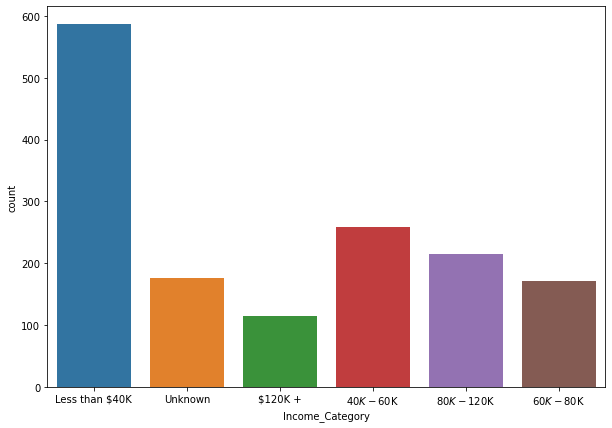

In [91]:
data=df[(df['Card_Category']=='Blue') & (df['Attrition_Flag']=='Attrited Customer')]

fig, ax=plt.subplots(figsize=(10,7))
sns.countplot(x=data['Income_Category'])
plt.show()

### Interpretation: Customers who are holding Blue card and having less than 40K salary are leaving the bank more.

## 14. Analysis of transaction amount (mean, median, mode) for blue card customers who are no longer with the bank and comparing it with the existing customers

In [92]:
exist=df[(df['Attrition_Flag']=='Existing Customer') & (df['Card_Category']=='Blue')]
attri=df[(df['Attrition_Flag']=='Attrited Customer') & (df['Card_Category']=='Blue')]

print("Mean of Transaction amount of Existing Customer: ",exist['Total_Trans_Amt'].mean())
print("Mean of Transaction amount of Attrited Customer: ",attri['Total_Trans_Amt'].mean())
print("MMedian of Transaction amount of Existing Customer: ",exist['Total_Trans_Amt'].median())
print("MMedian of Transaction amount of Attrited Customer: ",attri['Total_Trans_Amt'].median())
print("Mode of Transaction amount of Existing Customer: ",exist['Total_Trans_Amt'].mode()[0])
print("Mode of Transaction amount of Attrited Customer: ",attri['Total_Trans_Amt'].mode()[0])

Mean of Transaction amount of Existing Customer:  4468.249179914206
Mean of Transaction amount of Attrited Customer:  2957.835634451019
MMedian of Transaction amount of Existing Customer:  4085.0
MMedian of Transaction amount of Attrited Customer:  2314.0
Mode of Transaction amount of Existing Customer:  4253
Mode of Transaction amount of Attrited Customer:  2108


### Interpretation: There is a huge difference between the values. Customers who are staying with the bank are having high mean and median of transaction amount.

## 15. How is the credit limit of the blue card customers affecting the churn?

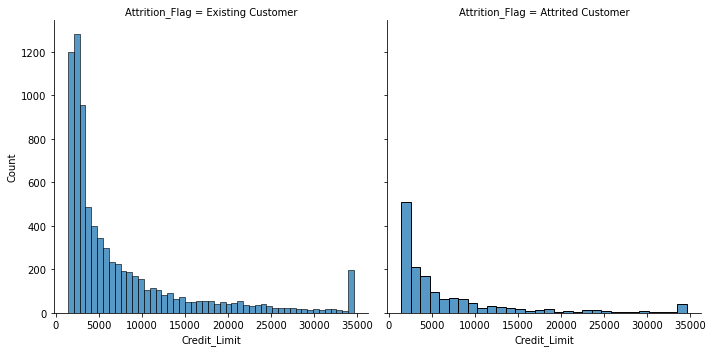

In [101]:
blue=df[(df['Card_Category']=='Blue')]

g = sns.FacetGrid(blue, col = "Attrition_Flag", height = 5)
g.map(sns.histplot, "Credit_Limit")
#sns.histplot(x=blue['Credit_Limit'],hue=blue['Attrition_Flag'])
plt.show()

### Interpretation: More percentage of Blue card holders are staying with the bank.

## 16. Analysis of the dependent count with respect to the customers who have churned out and the customers who are still using the services

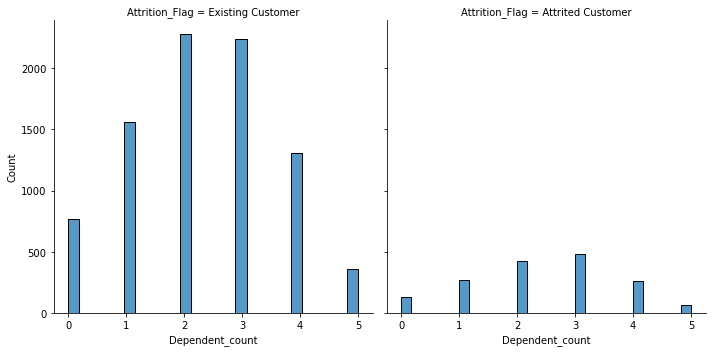

In [102]:
g = sns.FacetGrid(df, col = "Attrition_Flag", height = 5)
g.map(sns.histplot, "Dependent_count")

plt.show()

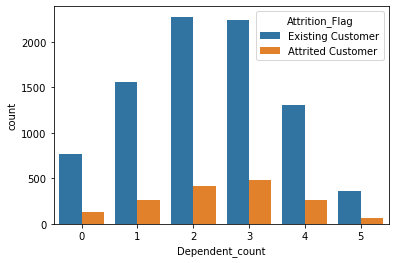

In [103]:
sns.countplot(x=df['Dependent_count'], hue=df['Attrition_Flag'])
plt.show()

### Interpretation: Customers with 2 or 3 dependents are staying more with the bank.

## 17. Is there a relation between the credit limit and the attrition of the customers?

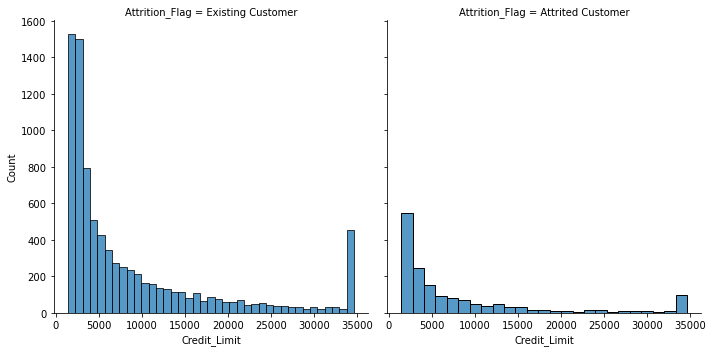

In [104]:
g = sns.FacetGrid(df, col = "Attrition_Flag", height = 5)
g.map(sns.histplot, "Credit_Limit")
#sns.histplot(x=blue['Credit_Limit'],hue=blue['Attrition_Flag'])
plt.show()

### Interpretation: There is no big difference between the existing and attrited customers. So there is no relation between the credit lime and attrition of customers.

## 18. What is the average utilization ratio of the credit card for each age sub-group between 40 and 50? (We need to group the customers into 4 buckets between 40 and 50.)

In [114]:
grp1=df[(df['Customer_Age']>=40) & (df['Customer_Age']<=42)]
grp2=df[(df['Customer_Age']>42) & (df['Customer_Age']<=45)]
grp3=df[(df['Customer_Age']>45) & (df['Customer_Age']<=47)]
grp4=df[(df['Customer_Age']>47) & (df['Customer_Age']<=50)]
print("Average utilization ratio of age group 40-42: ",grp1['Avg_Utilization_Ratio'].mean())
print("Average utilization ratio of age group 43-45: ",grp2['Avg_Utilization_Ratio'].mean())
print("Average utilization ratio of age group 46-47: ",grp3['Avg_Utilization_Ratio'].mean())
print("Average utilization ratio of age group 48-50: ",grp4['Avg_Utilization_Ratio'].mean())

Average utilization ratio of age group 40-42:  0.26497413793103447
Average utilization ratio of age group 43-45:  0.25596959225984844
Average utilization ratio of age group 46-47:  0.25446618106139446
Average utilization ratio of age group 48-50:  0.25609688122096924


### Interpretation: There is no significance difference in the average utilization ratio between the age groups.

## 19. How are the education level and income category affecting the customer churn?

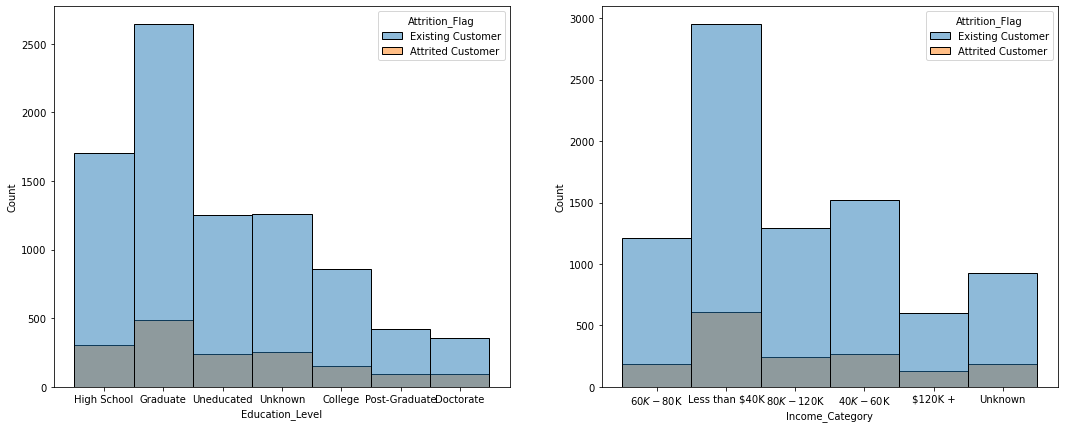

In [123]:
fig,ax = plt.subplots(1,2,figsize=(18,7))
sns.histplot(x=df['Education_Level'],hue=df['Attrition_Flag'], ax=ax[0])
sns.histplot(x=df['Income_Category'],hue=df['Attrition_Flag'], ax=ax[1])
plt.show()

### Interpretation: Customers with less education level are leaving the bank more. And Customers with less than 40K salary are leaving the bank more.

## 20. Identify the churned out customers with high income category, high education level, and high credit limit.

In [124]:
data=df[(df['Attrition_Flag']=='Attrited Customer') & (df['Income_Category']=='$120K +') & 
       (df['Education_Level']=='Doctorate') & (df['Credit_Limit']>=34000)]
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
6861,808747233,Attrited Customer,50.0,M,2,Doctorate,Married,$120K +,Silver,45,6,3,3,34516.0,0,34516.0,2573,55,0.000
9846,758753283,Attrited Customer,52.0,M,3,Doctorate,Married,$120K +,Blue,45,1,3,3,34516.0,550,33966.0,7341,71,0.016


### Interpretation: Customers with high education level, high income category and high credit limit are not leaving the bank much.

## 21. Is there is a relation between the attrition and the age of customers who have a lower utilization ratio?

In [127]:
min_val=df['Avg_Utilization_Ratio'].min()
min_val
data=df[(df['Attrition_Flag']=='Attrited Customer') & (df['Avg_Utilization_Ratio']==min_val)]
data['Customer_Age'].mean()


46.54006967061432

### Interpretation:Only customers who has age above 40 are leaving the bank if the utilization ratio is less.

## 22. Analysis of marital status and utilization ratio of the customers who are leaving out the bank versus those who are still with the bank

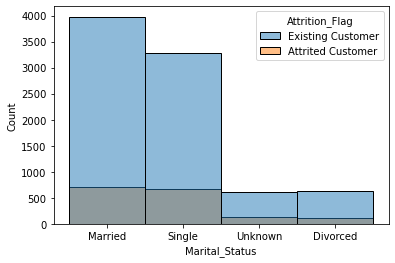

In [129]:
sns.histplot(x=df['Marital_Status'],hue=df['Attrition_Flag'])
plt.show()

### Interpretatiion: Almost equal ratio of married and single customers are leaving the bank.

In [132]:
exist=df[(df['Attrition_Flag']=='Existing Customer')]['Avg_Utilization_Ratio'].mean()
exit=df[(df['Attrition_Flag']=='Attrited Customer')]['Avg_Utilization_Ratio'].mean()
print("Average Utilization Ratio of Existing Customer: ",exist)
print("Average Utilization Ratio of Attrited Customer: ",exit)

Average Utilization Ratio of Existing Customer:  0.2964117647058822
Average Utilization Ratio of Attrited Customer:  0.16247510755992617


### Interpretation: Average Utilization Ratio of Existing Customer is more than that of attrited customers.

## 23. Is there a relation between the credit limit offered to the customers (having a lower utilization ratio) compared to those who are having a higher utilization ratio?

In [133]:
min_uti=df['Avg_Utilization_Ratio'].min()
max_uti=df['Avg_Utilization_Ratio'].max()

data_min=df[(df['Avg_Utilization_Ratio']==min_uti)]
data_max=df[(df['Avg_Utilization_Ratio']==max_uti)]

print("Average Credit Limit of Customers who are having low utilization ratio: ",data_min['Credit_Limit'].mean())
print("Average Credit Limit of Customers who are having high utilization ratio: ",data_max['Credit_Limit'].mean())

Average Credit Limit of Customers who are having low utilization ratio:  8098.466259666326
Average Credit Limit of Customers who are having high utilization ratio:  2435.0


### Interpretation: Customers with high utilization ratio are having less credit limit. And customers with low utilization ratio are having more credit limit

## Analysis: Female customers, who are aged between 40 to 50 and graduated are attrited more. And customers who are doing less transaction and having less utilization ratio are leaving the bank more. 
